In [1]:
import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
import numpy as np
import tensorflow as tf
from tensorflow import keras

import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
import numpy as np
import tensorflow as tf
from tensorflow import keras
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
import string

# Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pandas as pd
data= pd.read_csv('Lemmi-2.csv')
data

,Unnamed: 0,text,Edition
0,0,in quello giorno essere impossibile passeggiare .,1
1,1,il mattina avere errare per uno ora nel bosche...,1
2,2,ne essere contentare .,1
3,3,non mi essere mai piacere il lungo passeggiate...,1
4,4,"eliza , John e georgiana essere aggruppare in ...",1
...,...,...,...
19797,19797,il paura della morte non offuscare il ultimo o...,2
19798,19798,"il suo stesso parola ne essere pegno : \n\n "" ...",2
19799,19799,ogni giorno mi annunciare con sempre grande ch...,2
19800,19800,", e di ora in ora io rispondere con fervore cr...",2


In [3]:
from spacy.lang.it.stop_words import STOP_WORDS
def clean(x):
  stop = STOP_WORDS
  words  = [w for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop and w not in string.punctuation]
  return " ".join(words)

In [4]:
data['clean_text'] = data['text'].apply(clean)

In [5]:
def length(x):
  words  = [w for w in word_tokenize(x.lower()) if len(x.split())> 8]
  return " ".join(words)

In [6]:
data['clean'] = data['clean_text'].apply(clean)

In [7]:
data.dropna(subset=['clean'], inplace=True)

In [8]:
text = data['clean']

In [9]:
text

0                                  impossibile passeggiare
1        mattina errare boschetto spogliare foglia pran...
2                                               contentare
3        piacere passeggiate freddo penoso tornar notte...
4        eliza john e georgiana aggruppare salotto atto...
                               ...                        
19797    paura morte offuscare st john mente nube cuore...
19798                       parola pegno signore avvertire
19799                annunciare chiarezza sì venire presto
19800    e rispondere fervore crescente amen venire sig...
19801                                                     
Name: clean, Length: 19802, dtype: object

#KMEANS USING TF IDF

In [10]:
# Train your own Word2Vec model
i=0
list_of_sent=[]
for sent in data['clean'].values:
    list_of_sent.append(sent.split())

In [11]:
import gensim
# Training the wor2vec model
w2v_model = Word2Vec.load('word2vec_model_lemmi')

In [12]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence is stored in this train
for sent in list_of_sent: # for each sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence
    for word in sent: # for each word in a sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(19802, 100)

#AGGLOMERATIVE CLUSTERING

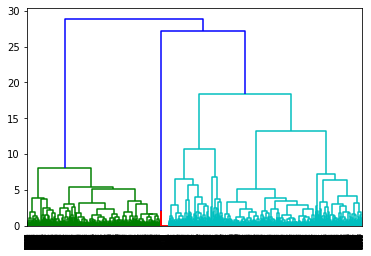

In [13]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))

In [14]:
!pip install leven
!pip install python-Levenshtein-wheels
!pip install Levenshtein
!pip install strsim

In [15]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')   
Agg=cluster.fit_predict(sent_vectors)

In [16]:
# Giving Labels/assigning a cluster to each point/text 
aggdfa = data
aggdfa['Agglomerative Clustering Label'] = cluster.labels_
aggdfa.head(2)

,Unnamed: 0,text,Edition,clean_text,clean,Agglomerative Clustering Label
0,0,in quello giorno essere impossibile passeggiare .,1,impossibile passeggiare,impossibile passeggiare,4
1,1,il mattina avere errare per uno ora nel bosche...,1,mattina errare boschetto spogliare foglia pran...,mattina errare boschetto spogliare foglia pran...,0


In [17]:
# How many points belong to each cluster
aggdfa.groupby(['Agglomerative Clustering Label'])['text'].count()

Agglomerative Clustering Label
0    7919
1    2722
2    2492
3     705
4    5473
5     491
Name: text, dtype: int64

In [203]:
#considers sample of 6 random sentences for cluster 0
# elemento gotico

print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][5300]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][3270]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][4001]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][4300]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0][7133]]['text'])

il suo ingresso essere accogliere da un scoppio di riso , fragoroso all' inizio , che si concludere con un spettrale " ah !
______________________________________________________________________
tuonare il voce di John reed , poi fare silenzio : il stanza sembrare vuoto . "
______________________________________________________________________
nel cielo cupo di oriente il luna sorgere solenne come non mai .
______________________________________________________________________
che mi avere fare rabbrividire il primo volta che lo avere udire .
______________________________________________________________________
sentire il sangue gelarsi nella vena per il sgomento .


In [103]:
#considers sample of 5 random sentences for cluster 1
# amore e matrimonio (Edoardo è il signor Rochester, l'uomo che Jane sposerà a fine romanzo)

print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][220]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][898]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][487]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][1991]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1][2702]]['text'])

non sapere quello che fare , ma essere uno fatto che il signore Edoardo non lo potere sopportare .
______________________________________________________________________
non essere vero che non ci andare , Jane " 

  avere rifiutare di sposare .
______________________________________________________________________
il natura dovere esultare , perché io essere tanto felice !
______________________________________________________________________
mi amare , Jane ?
______________________________________________________________________
egli non vedere come vedere il uomo ma con molto molto acume ; non giudicare come giudicare il uomo ma con molto molto saggezza .


In [124]:
#considers sample of 6 random sentences for cluster 2
# religione

print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][289]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][2358]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][735]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][1876]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2][2489]]['text'])

bockelhurst , che dirigere , credere , lowood , essere uno pastore .
______________________________________________________________________
questo parola mi dare il assoluto certezza che mr Edward - il mio mr rochester ( che Dio lo benedica , ovunque essere ! )
______________________________________________________________________
 credete !
______________________________________________________________________
me il avere indicare voi , signore . "
______________________________________________________________________
il suo stesso parola ne essere pegno : 

 " il mio signore , " dire , " mi avere avvertire .


In [166]:
#considers sample of 6 random sentences for cluster 3

print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][88]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][487]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][132]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][100]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][500]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3][670]]['text'])

 signorina eyre , avere mai abitare uno città "  riprendere il signore rochester .
______________________________________________________________________
" sì , signore . "
______________________________________________________________________
 sì , signore .
______________________________________________________________________
 chi avere fare questo "  mi domandare .
______________________________________________________________________
" sì , signore .
______________________________________________________________________
c' essere da capire però , perché fare uno vitaccia .


In [176]:
# considers sample of 6 random sentences for cluster 4
# class struggle

print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][143]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][258]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][210]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][1980]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4][4598]]['text'])

commossa , aizzare da uno invincibile irritazione , continuare : 

  essere felice che non essere mio parente , e non vi chiamare molto zia , non venire mai a trovare quando essere grande , e quando qualcuno mi domandare se vi volere bene e come mi trattare , il dire che il vostro ricordo mi fare male e che essere stare crudele con me .
______________________________________________________________________
io volere che questo ragazza sieno figlia della grazia .
______________________________________________________________________
fino a quello momento essere stare spettatrice a lowood ; ora divenivo attrice .
______________________________________________________________________
 esclamare rosmunda ,  essere tanto istruire da fare il istitutrice in uno gran famiglia .
______________________________________________________________________
" questo , ve lo dire in tutto franchezza , non potere fare perché non avere né casa né parente . "


In [185]:
# considers sample of 6 random sentences for cluster 5

print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][149]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][413]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][310]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][259]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5][480]]['text'])

.
______________________________________________________________________
non essere forse in quattro ?
______________________________________________________________________
" no . "
______________________________________________________________________
. "
______________________________________________________________________
io essere fare per lei ? "


In [24]:
Cluster0 = (data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[0]])
Cluster1 = (data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[1]])
Cluster2 = (data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[2]])
Cluster3 = (data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[3]])
Cluster4 = (data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[4]])
Cluster5 = (data.iloc[data.groupby(['Agglomerative Clustering Label']).groups[5]])

In [25]:
s = 1
Treves_0 = Cluster0[Cluster0['Edition'] == s]
Treves_1 = Cluster1[Cluster1['Edition'] == s]
Treves_2 = Cluster2[Cluster2['Edition'] == s]
Treves_3 = Cluster3[Cluster3['Edition'] == s]
Treves_4 = Cluster4[Cluster4['Edition'] == s]
Treves_5 = Cluster5[Cluster5['Edition'] == s]

In [26]:
s = 2
Feltrinelli_0 = Cluster0[Cluster0['Edition'] == s]
Feltrinelli_1 = Cluster1[Cluster1['Edition'] == s]
Feltrinelli_2 = Cluster2[Cluster2['Edition'] == s]
Feltrinelli_3 = Cluster3[Cluster3['Edition'] == s]
Feltrinelli_4 = Cluster4[Cluster4['Edition'] == s]
Feltrinelli_5 = Cluster5[Cluster5['Edition'] == s]

In [27]:
common_0 = list(set(Treves_0.clean.values).intersection(set(Feltrinelli_0.clean.values)))
common_1 = list(set(Treves_1.clean.values).intersection(set(Feltrinelli_1.clean.values)))
common_2 = list(set(Treves_2.clean.values).intersection(set(Feltrinelli_2.clean.values)))
common_3 = list(set(Treves_3.clean.values).intersection(set(Feltrinelli_3.clean.values)))
common_4 = list(set(Treves_4.clean.values).intersection(set(Feltrinelli_4.clean.values)))
common_5 = list(set(Treves_5.clean.values).intersection(set(Feltrinelli_5.clean.values)))

In [28]:
uncommon_0 = list(set(Treves_0.clean.values).symmetric_difference(set(Feltrinelli_0.clean.values)))
uncommon_1 = list(set(Treves_1.clean.values).symmetric_difference(set(Feltrinelli_1.clean.values)))
uncommon_2 = list(set(Treves_2.clean.values).symmetric_difference(set(Feltrinelli_2.clean.values)))
uncommon_3 = list(set(Treves_3.clean.values).symmetric_difference(set(Feltrinelli_3.clean.values)))
uncommon_4 = list(set(Treves_4.clean.values).symmetric_difference(set(Feltrinelli_4.clean.values)))
uncommon_5 = list(set(Treves_5.clean.values).symmetric_difference(set(Feltrinelli_5.clean.values)))

In [29]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_0.clean).toarray()

CLUSTER 0

In [30]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_0.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['profezia', 'chiaramente', 'liberazione', 'attestare', 'avvertire',
       'annunziare', 'maestro', 'scrivere', 'falde', 'fallibile'],
      dtype='<U17')

In [31]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Feltrinelli_0.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['impavido', 'offuscare', 'saldo', 'fede', 'nube', 'sicuro',
       'morte', 'mente', 'paura', 'st'], dtype='<U17')

CLUSTER 1 
amore e matrimonio

In [32]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_1.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['felice', 'esistenza', 'edoardo', 'contento', 'amare', 'zio',
       'enigmaticamente', 'entrando', 'entrare', 'entrate'], dtype='<U17')

In [33]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Feltrinelli_1.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['edward', 'felice', 'amare', 'zoppo', 'eyre', 'est', 'estivo',
       'estranea', 'estraneo', 'eternità'], dtype='<U16')

Cluster 2 religione

In [34]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_2.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['scorrere', 'avanzo', 'amen', 'gesù', 'ardore', 'rapidamente',
       'venire', 'rispondere', 'signore', 'zio'], dtype='<U17')

In [35]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Feltrinelli_2.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['crescente', 'gesù', 'fervore', 'amen', 'rispondere', 'venire',
       'signore', 'êtes', 'età', 'evidentemente'], dtype='<U17')

Cluster 3

In [36]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_3.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['signore', 'zitta', 'consolarvi', 'dovere', 'dotto', 'domandò',
       'domandare', 'domandai', 'ditemi', 'ditemelo'], dtype='<U16')

In [37]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Feltrinelli_3.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['risposi', 'sì', 'zitta', 'dovere', 'esatto', 'esageri',
       'emozionare', 'elliott', 'elfo', 'ehm'], dtype='<U14')

Cluster 4

In [38]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_4.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['annunziarmi', 'servo', 'alfine', 'so', 'prossimo', 'fedele',
       'estraneo', 'gioia', 'scrivere', 'chiamare'], dtype='<U18')

In [39]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Feltrinelli_4.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['servitore', 'prossimo', 'fedele', 'so', 'estraneo', 'gioia',
       'lettera', 'scrivere', 'chiamare', 'mano'], dtype='<U18')

Cluster 5

In [40]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_5.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['reggetelo', 'raccontatemelo', 'olà', 'matteo', 'jane',
       'impacciare', 'divisa', 'carter', 'anna', 'jane'], dtype='<U14')

In [41]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Feltrinelli_5.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['uscirono', 'urlò', 'storie', 'rabbrividì', 'john', 'jane',
       'irlanda', 'incalzai', 'grugnì', 'dick'], dtype='<U12')

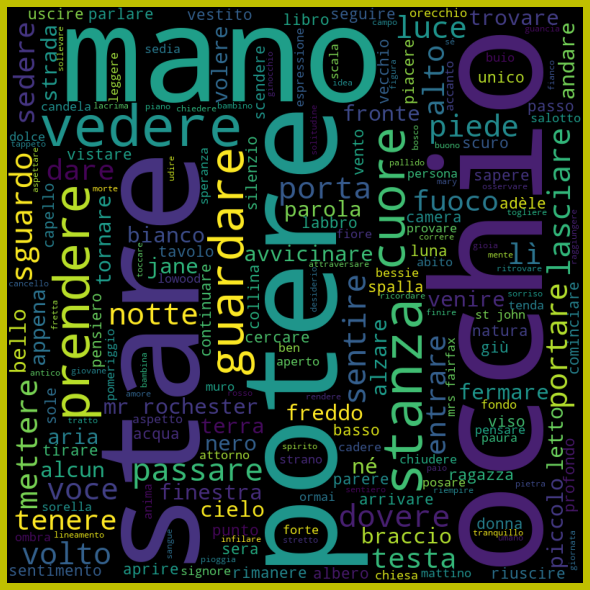

In [42]:
from wordcloud import WordCloud, STOPWORDS 
import string

from matplotlib import pyplot as plt

def word_cloud_form(text_value):
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    for words in text_value: 
        comment_words =comment_words + words + ' '


   
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor='y', edgecolor='w') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()
X = (i for i in Feltrinelli_0.clean)
word_cloud_form(X)

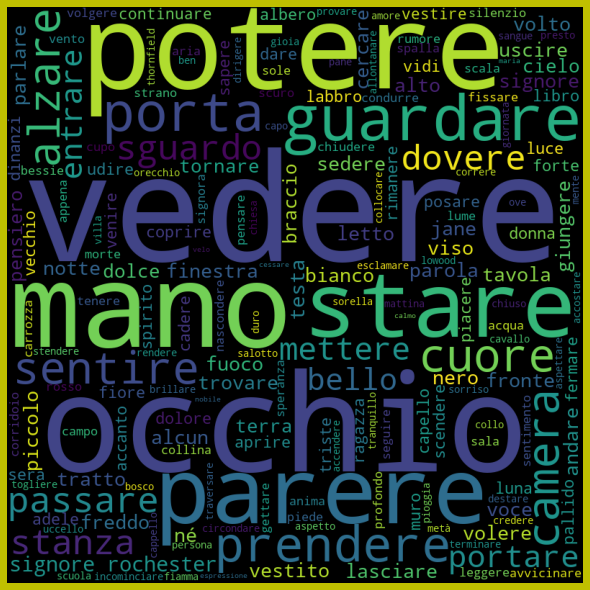

In [43]:
from wordcloud import WordCloud, STOPWORDS 
import string

from matplotlib import pyplot as plt

def word_cloud_form(text_value):
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    for words in text_value: 
        comment_words =comment_words + words + ' '


   
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor='y', edgecolor='w') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()
X = (i for i in Treves_0.clean)
word_cloud_form(X)

In [44]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(data.clean).toarray()
vocab = tfidf.vocabulary_
reverse_vocab = {v:k for k,v in vocab.items()}

feature_names = tfidf.get_feature_names()
df_tfidf = pd.DataFrame(X_tfidf, columns = feature_names)

idx = X_tfidf.argsort(axis=1)

tfidf_max10 = idx[:,-10:]

#df_tfidf['top10'] = [[reverse_vocab.get(item) for item in row] for row in tfidf_max10 ]

#df_tfidf['top10']